In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
import datetime as dt
import seaborn as sns 

from scipy.stats import linregress
from scipy.stats import norm

from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

# Study raw data files
ImportingData= "Resources/Clean_data_breastcancer.csv"

# Read both dataframes
Clean_Data= pd.read_csv(ImportingData,encoding="utf-8")

In [2]:
#Removing "Unnamed = 0" column
Clean_Data = Clean_Data.iloc[: , 1:]

In [3]:
Clean_Data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
Clean_Data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
Clean_Data['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

# 1 = Benign tumor

# 0 = Malignant tumor

In [6]:
from sklearn import preprocessing
from sklearn import metrics
from sklearn import utils


from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


from sklearn.feature_selection import SelectFromModel
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [7]:
#Separating features before training data
X = Clean_Data.drop('diagnosis', axis = 1)
Y = Clean_Data['diagnosis']

In [8]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [10]:
#Splitting data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3, random_state=40)

In [11]:
print(X.shape,X_train.shape,X_test.shape)

(569, 30) (398, 30) (171, 30)


# Using StandardScaler

In [12]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

# Training the models

## Logistic Regression

In [13]:
Logic = LogisticRegression()
LR_model = Logic.fit(X_train,Y_train)
LR_model_prediction = LR_model.predict(X_test)

## Confusion Matrix

In [14]:
Confusion = confusion_matrix(Y_test,LR_model_prediction)

In [15]:
Confusion

array([[ 54,   2],
       [  4, 111]], dtype=int64)

<AxesSubplot:>

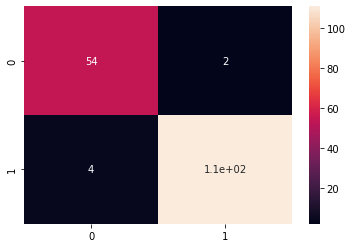

In [16]:
sns.heatmap(Confusion,annot=True)

In [17]:
TP = Confusion[0][1]
TN = Confusion[1][0]
FN = Confusion[1][1]
FP = Confusion[0][0]
print('Testing Accuracy:',(TP+TN)/TP+TN+FN+FP)

Testing Accuracy: 172.0


In [18]:
accuracy_score(Y_test,LR_model_prediction)

0.9649122807017544

In [19]:
print(classification_report(Y_test,LR_model_prediction))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        56
           1       0.98      0.97      0.97       115

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.97      0.96      0.97       171



## Decision Tree

In [20]:
DTree = DecisionTreeClassifier()
DT_model = DTree.fit(X_train,Y_train)

DT_model_prediction = DT_model.predict(X_test)
SecondConfusion = confusion_matrix(Y_test,DT_model_prediction)

In [21]:
SecondConfusion

array([[ 54,   2],
       [  8, 107]], dtype=int64)

In [22]:
accuracy_score(Y_test,DT_model_prediction)

0.9415204678362573

In [23]:
print(classification_report(Y_test,DT_model_prediction))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92        56
           1       0.98      0.93      0.96       115

    accuracy                           0.94       171
   macro avg       0.93      0.95      0.94       171
weighted avg       0.95      0.94      0.94       171



## Random Forest

In [30]:
RForest = RandomForestClassifier()

RF_model = RForest.fit(X_train,Y_train)

RF_model_prediction = RF_model.predict(X_test)
ThirdConfusion = confusion_matrix(Y_test,RF_model_prediction)

In [31]:
accuracy_score(Y_test,RF_model_prediction)

0.9590643274853801

In [32]:
print(classification_report(Y_test,RF_model_prediction))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        56
           1       0.99      0.95      0.97       115

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.96      0.96      0.96       171



In [36]:
RForest2 = RandomForestClassifier(n_estimators=200)

RF_model2 = RForest2.fit(X_train,Y_train)

RF_model_prediction2 = RF_model2.predict(X_test)
ThirdConfusion2 = confusion_matrix(Y_test,RF_model_prediction2)

In [37]:
accuracy_score(Y_test,RF_model_prediction2)

0.9766081871345029

In [38]:
RForest3 = RandomForestClassifier(n_estimators=500)

RF_model3 = RForest3.fit(X_train,Y_train)

RF_model_prediction3 = RF_model3.predict(X_test)
ThirdConfusion3 = confusion_matrix(Y_test,RF_model_prediction3)

In [39]:
accuracy_score(Y_test,RF_model_prediction3)

0.9649122807017544

##  K - Nearest Neighbor (KNN)

In [27]:
models = []

models.append(('SVM', SVC()))

In [28]:
Results = []
Names = []

for name , model in models:
    kfold=KFold(n_splits = 10, random_state = 40, shuffle=True)
    cross_value_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring = 'accuracy')
    Results.append(cross_value_results)
    Names.append(name)

In [41]:
Message = '%s, %f, (%f)' % (name, cross_value_results.mean(), cross_value_results.std())
print(Message)

SVM, 0.969936, (0.021781)
